In [62]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Administrator\Desktop\train.csv")

# baseline model 구축

In [30]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
def check_missing_per_row(df):
    """
    행별로 결측치 개수를 확인하는 함수
    :param df: 입력 데이터프레임
    :return: 행별 결측치 개수와 비율을 포함한 데이터프레임
    """
    # 각 행별 결측치 개수 계산
    missing_count = df.isnull().sum(axis=1)

    # 각 행별 결측치 비율 계산
    missing_percentage = (missing_count / df.shape[1]) * 100

    # 원본 데이터에 결측치 정보 추가
    df_with_missing_info = df.copy()
    df_with_missing_info['Missing Count'] = missing_count
    df_with_missing_info['Missing Percentage'] = missing_percentage

    return df_with_missing_info

In [28]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [ ]:
check_row=check_missing_per_row(df)
check_row = check_row.sort_values(by='Missing Percentage', key=lambda x: x, ascending=False)
check_row.head(20)
check_row[check_row['Missing Percentage']]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Missing Count,Missing Percentage
185713,315294,0,Revolving loans,M,N,N,0,67500.0,135000.0,6750.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,61,50.000000
133770,255145,0,Revolving loans,F,N,Y,0,225000.0,405000.0,20250.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,61,50.000000
197736,329262,0,Revolving loans,M,N,N,0,135000.0,180000.0,9000.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,61,50.000000
116937,235599,0,Revolving loans,M,N,N,0,225000.0,720000.0,36000.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,61,50.000000
269492,412312,0,Revolving loans,F,N,N,0,450000.0,1350000.0,67500.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,61,50.000000
69707,180861,0,Revolving loans,F,N,Y,0,67500.0,202500.0,10125.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,61,50.000000
269786,412671,0,Revolving loans,F,N,N,1,99000.0,247500.0,12375.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,61,50.000000
150206,274127,0,Revolving loans,M,N,N,0,450000.0,1237500.0,61875.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,61,50.000000
244833,383369,0,Revolving loans,F,N,Y,2,67500.0,270000.0,13500.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,61,50.000000
290495,436548,0,Revolving loans,F,N,Y,2,135000.0,157500.0,7875.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,60,49.180328


FONDKAPREMONT_MODE: 주택 수리 자금 형태 -  원핫
HOUSETYPE_MODE: 주택 유형 - 타겟
WALLSMATERIAL_MODE: 벽 재질 -  타겟
EMERGENCYSTATE_MODE: 비상 상태 여부 - 바이너리

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: 

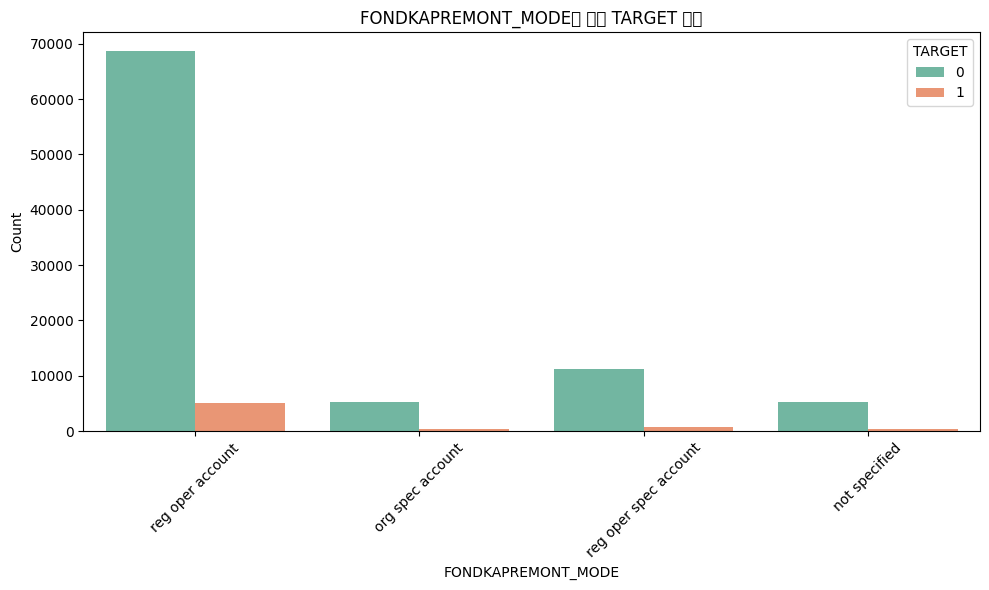


FONDKAPREMONT_MODE에 따른 TARGET이 1인 비율:
FONDKAPREMONT_MODE
not specified            0.075435
org spec account         0.058195
reg oper account         0.069782
reg oper spec account    0.065563
Name: TARGET, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: 

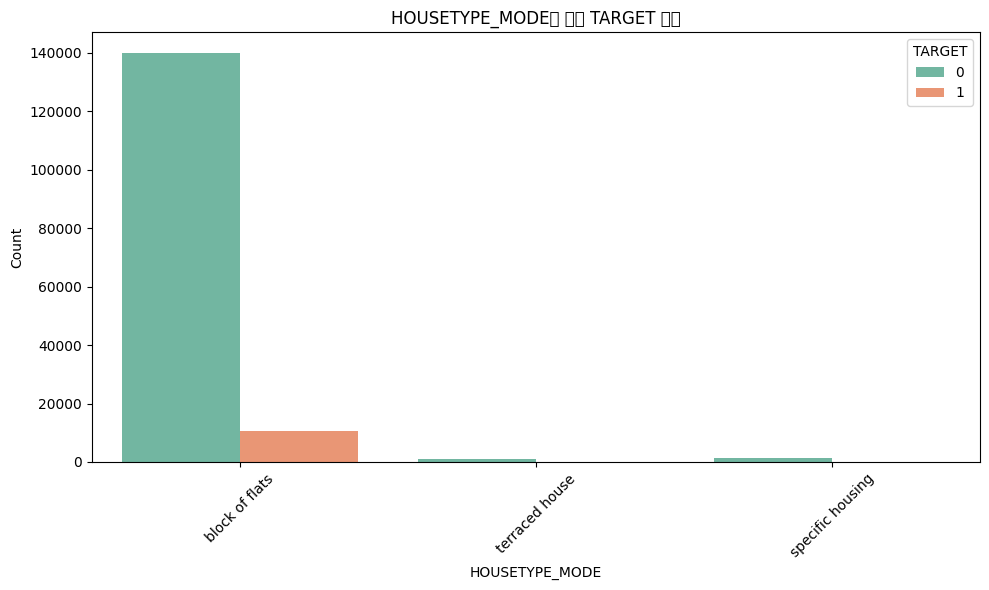


HOUSETYPE_MODE에 따른 TARGET이 1인 비율:
HOUSETYPE_MODE
block of flats      0.069434
specific housing    0.101401
terraced house      0.084983
Name: TARGET, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: 

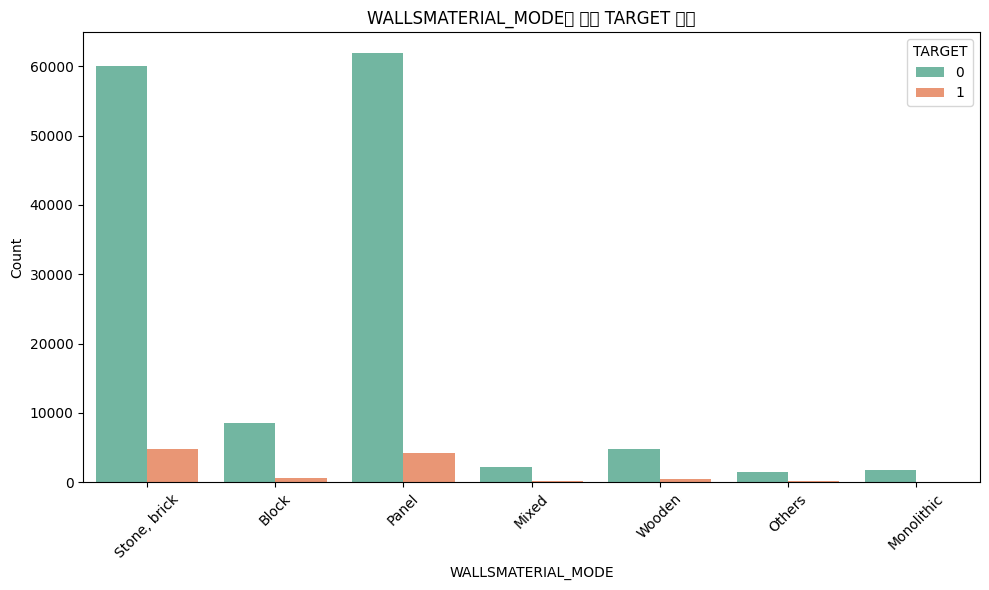


WALLSMATERIAL_MODE에 따른 TARGET이 1인 비율:
WALLSMATERIAL_MODE
Block           0.070247
Mixed           0.075348
Monolithic      0.047218
Others          0.083077
Panel           0.063477
Stone, brick    0.074057
Wooden          0.096979
Name: TARGET, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8108\824304638.py:25: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: 

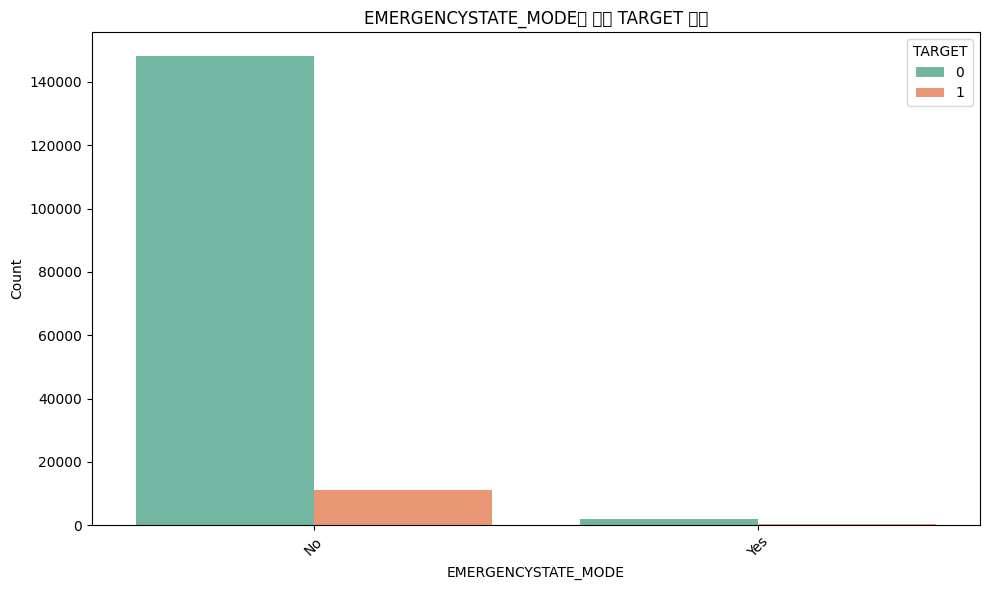


EMERGENCYSTATE_MODE에 따른 TARGET이 1인 비율:
EMERGENCYSTATE_MODE
No     0.069649
Yes    0.095790
Name: TARGET, dtype: float64


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# 범주형 변수 목록 추출
selected_columns = [
    'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE',
    'WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE'
]


# target 변수 이름 (예: 'target' 변수로 가정)
target_column = 'TARGET'

# 각 범주형 변수에 대해 분포 시각화 및 1인 값의 비율 계산
for column in selected_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue=target_column, palette="Set2")
    plt.title(f"{column}에 따른 {target_column} 분포")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title=target_column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # TARGET이 1인 비율 계산 및 출력
    target_1_ratio = df.groupby(column)[target_column].mean()
    print(f"\n{column}에 따른 {target_column}이 1인 비율:")
    print(target_1_ratio)


In [ ]:
import pandas as pd

def encode_columns(df):
    """
    주어진 규칙에 따라 특정 열들을 인코딩하는 함수
    :param df: 데이터프레임
    :return: 인코딩된 데이터프레임
    """
    # 1. NAME_CONTRACT_TYPE: 대출 유형 (현금 또는 리볼빙)
    df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})

    # 2. CODE_GENDER: 성별 (XNA 제거, 남성: 0, 여성: 1)
    df = df[df['CODE_GENDER'] != 'XNA'].copy()
    df['CODE_GENDER'] = df['CODE_GENDER'].map({'M': 0, 'F': 1})

    # 3. FLAG_OWN_CAR: 자동차 소유 여부 (Y: 1, N: 0)
    df.loc[:, 'FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})

    # 4. FLAG_OWN_REALTY: 주택 소유 여부 (Y: 1, N: 0)
    df.loc[:, 'FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

    # 5. NAME_TYPE_SUITE: 대출 신청 시 동행인 (Unaccompanied: 0, 나머지: 1)
    df.loc[:, 'NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].map({'Unaccompanied': 0}).fillna(1)

    # 6. NAME_INCOME_TYPE: 소득 유형
    income_map = {
        'Working': 0,
        'Commercial associate': 1,
        'Pensioner': 2,
        'State servant': 2
    }
    df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].map(income_map).fillna(3)

    # 7. NAME_EDUCATION_TYPE: 학력 수준 (순서형 인코딩 0~4)
    education_map = {
        'Lower secondary': 0,
        'Secondary / secondary special': 1,
        'Incomplete higher': 2,
        'Higher education': 3,
        'Academic degree': 4
    }
    df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map(education_map)

    # 8. NAME_FAMILY_STATUS: 가족 상태 (Married or Civil marriage → 1, Single → 2, Separated or Widow → 3)
    family_status_map = {
        'Married': 1, 'Civil marriage': 1,
        'Single / not married': 2,
        'Separated': 3, 'Widow': 3
    }
    df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].map(family_status_map)

    # 9. NAME_HOUSING_TYPE: 주거 형태 (House/apartment: 1, 나머지: 0)
    df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].map({
        'House / apartment': 1
    }).fillna(0)

    # 10. OCCUPATION_TYPE: 직업 유형 (Target Encoding)
    if 'OCCUPATION_TYPE' in df.columns and 'TARGET' in df.columns:
        occupation_target_map = df.groupby('OCCUPATION_TYPE')['TARGET'].mean()
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].map(occupation_target_map)

    # 11. ORGANIZATION_TYPE: 대출 신청자의 소속 조직 유형 (Frequency Encoding)
    if 'ORGANIZATION_TYPE' in df.columns:
        organization_type_map = df['ORGANIZATION_TYPE'].value_counts() / len(df)
        df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].map(organization_type_map)

    # 12. WEEKDAY_APPR_PROCESS_START: 평일(0), 주말(1)로 인코딩
    if 'WEEKDAY_APPR_PROCESS_START' in df.columns:
        weekend_days = {'SATURDAY', 'SUNDAY'}
        df['WEEKDAY_APPR_PROCESS_START'] = df['WEEKDAY_APPR_PROCESS_START'].apply(
            lambda x: 1 if x in weekend_days else 0
        )

    # 13. FONDKAPREMONT_MODE: 원핫 인코딩
    df = pd.get_dummies(df, columns=['FONDKAPREMONT_MODE'], drop_first=True)

    # 14. HOUSETYPE_MODE: 타겟 인코딩
    if 'HOUSETYPE_MODE' in df.columns and 'TARGET' in df.columns:
        house_target_mean = df.groupby('HOUSETYPE_MODE')['TARGET'].mean()
        df['HOUSETYPE_MODE_ENCODED'] = df['HOUSETYPE_MODE'].map(house_target_mean)
        df.drop(columns=['HOUSETYPE_MODE'], inplace=True)

    # 15. WALLSMATERIAL_MODE: 타겟 인코딩
    if 'WALLSMATERIAL_MODE' in df.columns and 'TARGET' in df.columns:
        walls_target_mean = df.groupby('WALLSMATERIAL_MODE')['TARGET'].mean()
        df['WALLSMATERIAL_MODE_ENCODED'] = df['WALLSMATERIAL_MODE'].map(walls_target_mean)
        df.drop(columns=['WALLSMATERIAL_MODE'], inplace=True)

    # 16. EMERGENCYSTATE_MODE: 바이너리 인코딩 (Yes -> 1, No -> 0)
    if 'EMERGENCYSTATE_MODE' in df.columns:
        df['EMERGENCYSTATE_MODE'] = df['EMERGENCYSTATE_MODE'].map({'Yes': 1, 'No': 0})

    # NAME_INCOME_TYPE 및 NAME_FAMILY_STATUS를 원핫 인코딩
    df = pd.get_dummies(df, columns=['NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS'], drop_first=True)
    
    

    return df


# 데이터프레임 예시
df = encode_columns(df)




In [70]:
# 변환할 열 목록
columns_to_convert = [
    'NAME_INCOME_TYPE_1.0',
    'NAME_INCOME_TYPE_2.0',
    'NAME_INCOME_TYPE_3.0',
    'NAME_FAMILY_STATUS_2.0',
    'NAME_FAMILY_STATUS_3.0'
]
for column in df:
        if column in df.columns:
            df[column] = df[column].apply(lambda x: int(x) if pd.notnull(x) and isinstance(x, bool) else x)  # True -> 1, False -> 0, 결측치는 유지
        else:
            print(f"Warning: Column '{column}' not found in the dataframe.")


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_ENCODED,WALLSMATERIAL_MODE_ENCODED,NAME_INCOME_TYPE_1.0,NAME_INCOME_TYPE_2.0,NAME_INCOME_TYPE_3.0,NAME_FAMILY_STATUS_2.0,NAME_FAMILY_STATUS_3.0
0,100002,1,0,0,0,1,0,202500.0,406597.5,24700.5,...,0,1,0,0.069435,0.074059,0,0,0,1,0
1,100003,0,0,1,0,0,0,270000.0,1293502.5,35698.5,...,0,1,0,0.069435,0.070247,0,1,0,0,0
2,100004,0,1,0,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,NaN,NaN,0,0,0,1,0
3,100006,0,0,1,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,0,0,0,0,0
4,100007,0,0,0,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,NaN,NaN,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,0,0,157500.0,254700.0,27558.0,...,0,1,0,0.069435,0.074059,0,0,0,0,1
307507,456252,0,0,1,0,1,0,72000.0,269550.0,12001.5,...,0,1,0,0.069435,0.074059,0,1,0,0,1
307508,456253,0,0,1,0,1,0,153000.0,677664.0,29979.0,...,0,1,0,0.069435,0.063478,0,0,0,0,1
307509,456254,1,0,1,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0.069435,0.074059,1,0,0,0,0


In [73]:
df.to_csv("incoded_all.csv")